In [1]:
from google.colab import files
uploaded = files.upload()

Saving vehicle4.csv to vehicle4.csv


In [2]:
import pandas as pd

# Load and display the first few rows of the dataset to understand its structure
vehicle4 = pd.read_csv('vehicle4.csv')

# Display the first few records to understand the dataset
vehicle4.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,0,0,0,1,1,True,False,...,False,True,True,False,False,False,False,False,False,False
1,80,1,1,0,0,0,1,0,True,False,...,False,True,True,False,False,False,False,False,False,False
2,80,1,1,1,0,0,1,1,True,False,...,False,True,True,False,False,False,False,False,False,False
3,80,1,1,1,0,0,1,0,True,False,...,False,True,True,False,False,False,False,False,False,False
4,80,1,1,1,0,0,1,0,True,False,...,False,True,True,False,False,False,False,False,False,False


##Modeling

For this project, we will use Decision Tree model because it can be advantageous due to its ability to handle both numerical and categorical features, which are common in transportation-related datasets like this dataset.

In [3]:
selected_features=['coupon_Carry out & Take away', 'coupon_Restaurant(<20)',
       'destination_No Urgent Place', 'expiration_2h', 'passanger_Friend(s)',
       'CoffeeHouse_never', 'weather_Sunny', 'toCoupon_GEQ25min',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)']

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Extract the selected features and target variable
X = vehicle4[selected_features]
y = vehicle4['Y']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for each classifier
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

# Initialize classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_lr = LogisticRegression(random_state=42)
clf_knn = KNeighborsClassifier()

# Perform Grid Search Cross Validation for each classifier
grid_search_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(estimator=clf_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(estimator=clf_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# List of classifiers for comparison
classifiers = {
    'Decision Tree': grid_search_dt,
    'Logistic Regression': grid_search_lr,
    'K-Nearest Neighbors': grid_search_knn
}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    cv_scores = cross_val_score(clf.best_estimator_, X_train, y_train, cv=5)
    print(f"{name} - Mean Cross-validation Score: {cv_scores.mean()}")

# Select the best classifier based on cross-validation scores
best_clf_name = max(classifiers, key=lambda k: classifiers[k].best_score_)
best_clf = classifiers[best_clf_name].best_estimator_

# Train the best classifier on the entire training set
best_clf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = best_clf.predict(X_test)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Classifier: {best_clf_name}")
print(f"Accuracy on Test Set: {accuracy}")

Decision Tree - Mean Cross-validation Score: 0.6846375340809494
Logistic Regression - Mean Cross-validation Score: 0.6678841041353575
K-Nearest Neighbors - Mean Cross-validation Score: 0.6732068747010709
Best Classifier: Decision Tree
Accuracy on Test Set: 0.6886085928261726


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Extract the selected features and target variable
X = vehicle4[selected_features]
y = vehicle4['Y']  # Assuming 'Y' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6882144264879779


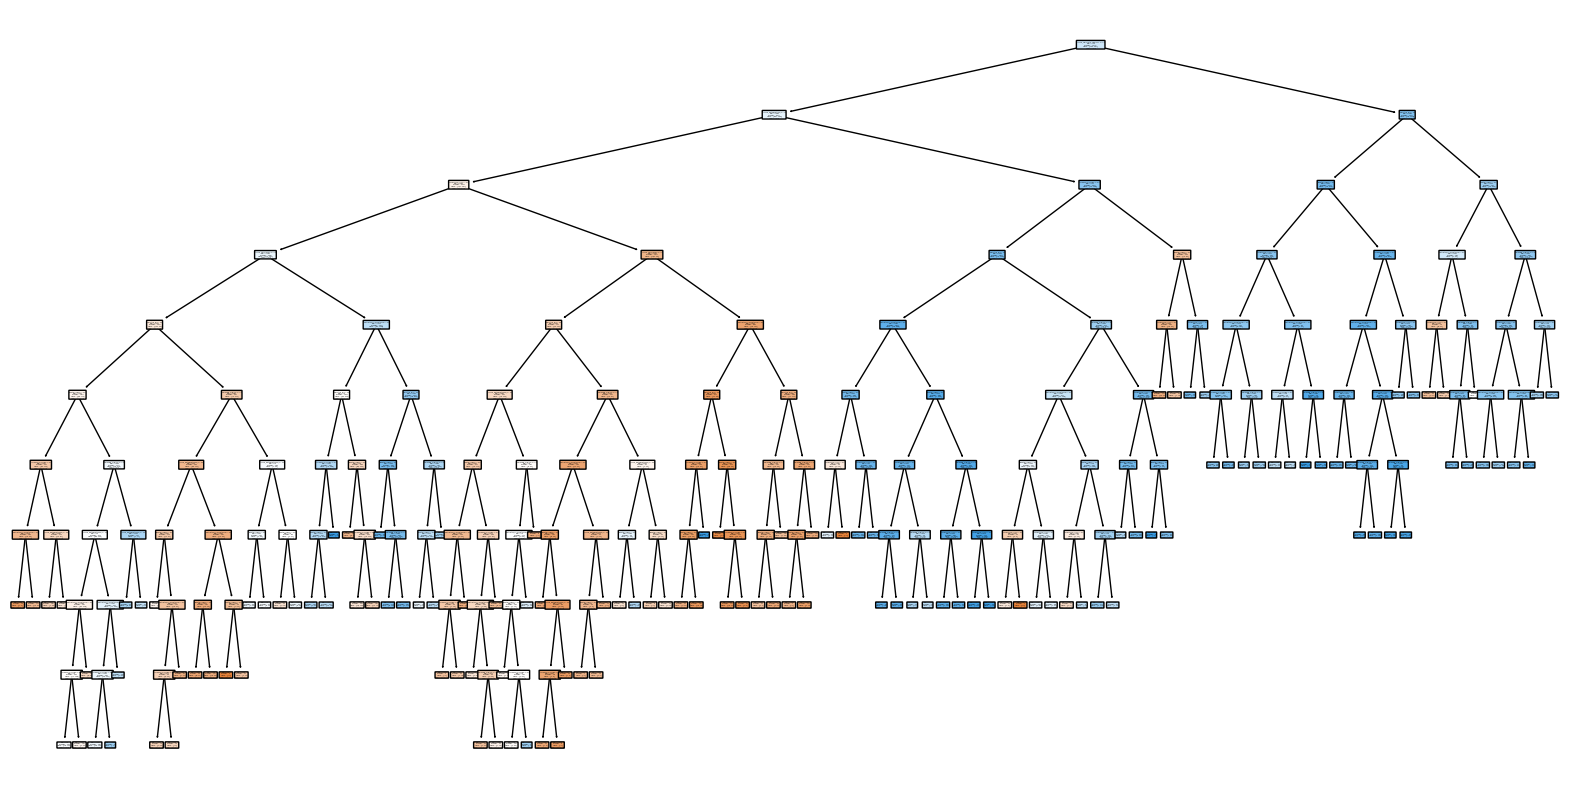

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=selected_features, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

the Decision Tree classifier appears to be the most suitable choice for your dataset and problem.

##Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate each model's performance metrics
performance_metrics = {}
for name, clf in classifiers.items():
    y_pred_train = clf.best_estimator_.predict(X_train)
    y_pred_test = clf.best_estimator_.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    performance_metrics[name] = {
        'Train Accuracy': accuracy_train,
        'Train Precision': precision_train,
        'Train Recall': recall_train,
        'Train F1 Score': f1_train,
        'Test Accuracy': accuracy_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1 Score': f1_test
    }

# Summary of all models' performance
print("Summary of Models' Performance:")
for name, metrics in performance_metrics.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Recommend the best model
best_model = max(performance_metrics, key=lambda k: performance_metrics[k]['Test Accuracy'])
print(f"\nRecommendation: The best model is {best_model}.")

# Conclusion
print("\nConclusion:")
print(f"The {best_model} model demonstrates the highest accuracy on the test set, making it the recommended choice for predicting coupon redemption behavior in this dataset.")


Summary of Models' Performance:

Decision Tree:
Train Accuracy: 0.6936
Train Precision: 0.7044
Train Recall: 0.7995
Train F1 Score: 0.7490
Test Accuracy: 0.6886
Test Precision: 0.6898
Test Recall: 0.7984
Test F1 Score: 0.7401

Logistic Regression:
Train Accuracy: 0.6674
Train Precision: 0.6913
Train Recall: 0.7556
Train F1 Score: 0.7220
Test Accuracy: 0.6657
Test Precision: 0.6737
Test Recall: 0.7722
Test F1 Score: 0.7196

K-Nearest Neighbors:
Train Accuracy: 0.6864
Train Precision: 0.7268
Train Recall: 0.7233
Train F1 Score: 0.7251
Test Accuracy: 0.6795
Test Precision: 0.7087
Test Recall: 0.7182
Test F1 Score: 0.7134

Recommendation: The best model is Decision Tree.

Conclusion:
The Decision Tree model demonstrates the highest accuracy on the test set, making it the recommended choice for predicting coupon redemption behavior in this dataset.


##Conclusion

the Decision Tree model offers the most effective solution for predicting coupon redemption behavior in this dataset. However, further experimentation and evaluation on different datasets may be necessary to validate these findings and explore additional modeling techniques.